### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.
# Parte 1
A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---

Función de transferencia de la planta Gp(s):
<TransferFunction>: sys[34]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

Función de transferencia de lazo cerrado G_LC(s):
<TransferFunction>: sys[36]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10

Polos del sistema en lazo cerrado:
[-3.+1.j -3.-1.j]



c:\Users\52953\OneDrive\Escritorio\Control Clásico\.venv\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


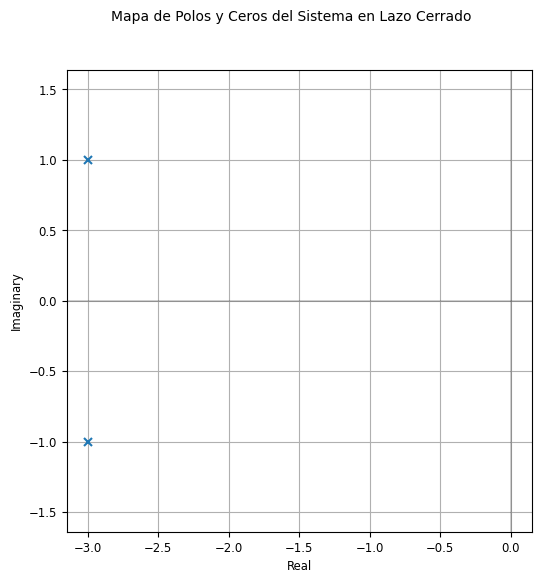

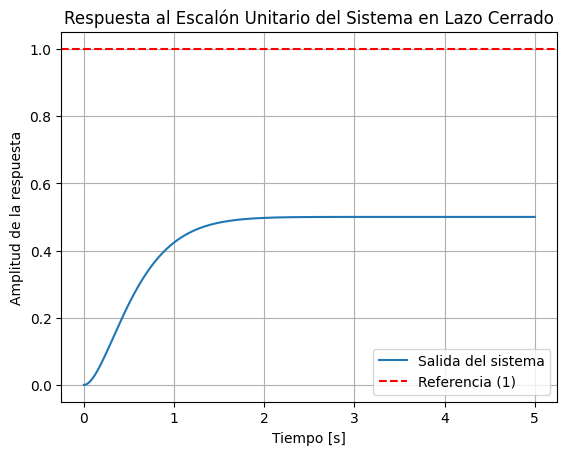

=== Métricas de Desempeño del Sistema en Lazo Cerrado ===
Tiempo de establecimiento (s): 1.6746
Sobreimpulso (%): 0.0000
Error en estado estacionario: 0.5000


In [10]:
# ===========================================
# Análisis del sistema base (sin controlador)
# ===========================================

import control as ct
import numpy as np
import matplotlib.pyplot as plt

# 1) Definir la función de transferencia de la planta Gp(s) = 5 / (s² + 6s + 5)
numerador = [5.0]
denominador = [1.0, 6.0, 5.0]
Gp = ct.TransferFunction(numerador, denominador)
print("Función de transferencia de la planta Gp(s):")
print(Gp)
print()

# 2) Obtener la función de transferencia de lazo cerrado con retroalimentación unitaria
G_lazo_cerrado = ct.feedback(Gp, 1)
print("Función de transferencia de lazo cerrado G_LC(s):")
print(G_lazo_cerrado)
print()

# 3) Obtener e imprimir los polos del sistema en lazo cerrado
polos = ct.poles(G_lazo_cerrado)
print("Polos del sistema en lazo cerrado:")
print(polos)
print()

# 4) Graficar el mapa de polos y ceros
plt.figure(figsize=(6,6))
ct.pzmap(G_lazo_cerrado, plot=True, title="Mapa de Polos y Ceros del Sistema en Lazo Cerrado")
plt.grid(True)
plt.show()

# 5) Simular y graficar la respuesta al escalón unitario (0 a 5 segundos)
tiempo = np.linspace(0, 5, 501)
t, respuesta = ct.step_response(G_lazo_cerrado, tiempo)

plt.figure()
plt.plot(t, respuesta, label="Salida del sistema")
plt.axhline(1, color='r', linestyle='--', label="Referencia (1)")
plt.title("Respuesta al Escalón Unitario del Sistema en Lazo Cerrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud de la respuesta")
plt.legend()
plt.grid(True)
plt.show()

# 6) Calcular las métricas de desempeño
info = ct.step_info(G_lazo_cerrado)
valor_final = respuesta[-1]
error_ee = 1.0 - valor_final  # Error en estado estacionario para entrada escalón unitario

# Traducción de métricas
metricas = {
    
    "Tiempo de establecimiento (s)": info.get("SettlingTime", None),
    "Sobreimpulso (%)": info.get("Overshoot", None),
    "Error en estado estacionario": error_ee
}

print("=== Métricas de Desempeño del Sistema en Lazo Cerrado ===")
for clave, valor in metricas.items():
    if valor is not None:
        print(f"{clave}: {valor:.4f}")



# Parte 2 — Proceso de diseño del PID
A continuación se explica el razonamiento seguido para sintonizar las ganancias del controlador PID

$G_c(s)=K_p+\frac{K_i}{s}+K_ds$ de modo que el sistema en lazo cerrado cumpla simultáneamente con:

• Error en estado estacionario $e_{ss}=0$ (para entrada escalón unidad).

• Sobreimpulso (Overshoot) menor al 5%.

• Tiempo de establecimiento (al 2%) menor a 1.0 s.


### Razonamiento 

1. Kp = 80.0 (Proporcional)
- La ganancia proporcional incrementa la rapidez de la respuesta y reduce el error transitorio.
- Un valor alto como 80 desplaza los polos dominantes hacia la izquierda en el plano complejo, lo que reduce el tiempo de establecimiento.
- Sin embargo, solo Kp tiende a generar sobreimpulso, por eso se combina con Kd.

2. Ki = 60.0 (Integral)
- La acción integradora es crucial para eliminar el error en estado estacionario.
- Ki = 60 proporciona suficiente fuerza para que la salida alcance exactamente la referencia de 1 sin error a largo plazo.
- No es demasiado alta, evitando que el integrador genere exceso de oscilaciones o sobreimpulso significativo.

3. Kd = 15 (Derivativa)
- La derivada actúa como amortiguador, proporcionando fase positiva y contrarrestando el sobreimpulso generado por Kp y Ki.
- Con Kd = 15, el sistema reduce oscilaciones y sobreimpulso, logrando cumplir la especificación de menos del 5%.
- También ayuda a suavizar la respuesta, evitando picos bruscos en la salida.

Ganancias del controlador PID:
Kp = 80.0
Ki = 60.0
Kd = 15

Controlador PID Gc(s):
<TransferFunction>: sys[78]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  15 s^2 + 80 s + 60
  ------------------
          s

Función de transferencia de lazo cerrado con PID G_LC_PID(s):
<TransferFunction>: sys[82]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     75 s^2 + 400 s + 300
  --------------------------
  s^3 + 81 s^2 + 405 s + 300

Polos del sistema con controlador PID:
[-75.70245564+0.j  -4.39608747+0.j  -0.90145689+0.j]



c:\Users\52953\OneDrive\Escritorio\Control Clásico\.venv\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


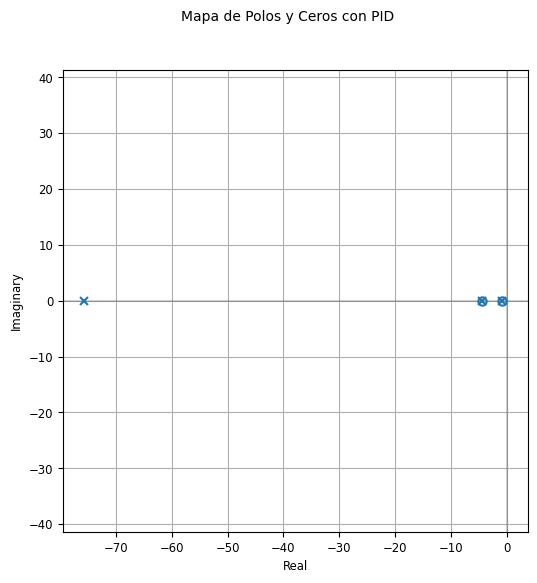

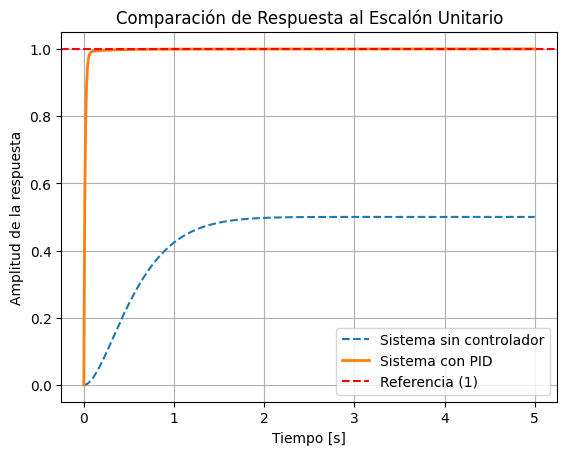

=== Métricas de Desempeño con Control PID ===
Tiempo de establecimiento (s): 0.0590
Sobreimpulso (%): 0.0000
Error en estado estacionario: 0.0000


In [ ]:
# ===========================================
# Parte 3: Implementación del controlador PID
# ===========================================

import control as ct
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# 1) Definir las ganancias del PID
# -------------------------------------------
# (Ejemplo de diseño basado en los requisitos de la Parte 2)
# Puedes ajustar estas ganancias según tus resultados experimentales
Kp = 80.0
Ki = 60.0
Kd = 15

print("Ganancias del controlador PID:")
print(f"Kp = {Kp}")
print(f"Ki = {Ki}")
print(f"Kd = {Kd}")
print()

# -------------------------------------------
# 2) Crear la función de transferencia del controlador PID
#    Gc(s) = (Kd*s^2 + Kp*s + Ki) / s
# -------------------------------------------
Gc = ct.TransferFunction([Kd, Kp, Ki], [1, 0])
print("Controlador PID Gc(s):")
print(Gc)
print()

# -------------------------------------------
# 3) Definir la planta y calcular el lazo cerrado con PID
# -------------------------------------------
Gp = ct.TransferFunction([5], [1, 6, 5])  # misma planta de la Parte 1
G_lazo_cerrado_PID = ct.feedback(Gc * Gp, 1)

print("Función de transferencia de lazo cerrado con PID G_LC_PID(s):")
print(G_lazo_cerrado_PID)
print()

# -------------------------------------------
# 4) Imprimir polos del sistema con PID
# -------------------------------------------
polos_PID = ct.poles(G_lazo_cerrado_PID)
print("Polos del sistema con controlador PID:")
print(polos_PID)
print()

# -------------------------------------------
# 5) Mapa de polos y ceros del sistema controlado
# -------------------------------------------
plt.figure(figsize=(6,6))
ct.pzmap(G_lazo_cerrado_PID, plot=True, title="Mapa de Polos y Ceros con PID")
plt.grid(True)
plt.show()

# -------------------------------------------
# 6) Comparar respuesta del sistema base y del PID
# -------------------------------------------
# Sistema base (sin controlador)
G_lazo_cerrado_base = ct.feedback(Gp, 1)
T = np.linspace(0, 5, 501)

# Simulaciones
t_base, y_base = ct.step_response(G_lazo_cerrado_base, T)
t_PID, y_PID = ct.step_response(G_lazo_cerrado_PID, T)

# Gráfica comparativa
plt.figure()
plt.plot(t_base, y_base, label="Sistema sin controlador", linestyle="--")
plt.plot(t_PID, y_PID, label="Sistema con PID", linewidth=2)
plt.axhline(1, color='r', linestyle='--', label="Referencia (1)")
plt.title("Comparación de Respuesta al Escalón Unitario")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud de la respuesta")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------
# 7) Métricas de desempeño finales
# -------------------------------------------
info_PID = ct.step_info(G_lazo_cerrado_PID)
valor_final_PID = y_PID[-1]
error_ee_PID = 1.0 - valor_final_PID

metricas_PID = {
    
    "Tiempo de establecimiento (s)": info_PID.get("SettlingTime", None),
    "Sobreimpulso (%)": info_PID.get("Overshoot", None),
    "Error en estado estacionario": error_ee_PID
}

print("=== Desempeño con Control PID ===")
for clave, valor in metricas_PID.items():
    if valor is not None:
        print(f"{clave}: {valor:.4f}")
